In [1]:
import numpy as np
from scipy.spatial import distance_matrix
import cvxpy as cvx
import matplotlib.pyplot as plt

In [2]:
# Generate some random Points
num_points = 20
points = np.random.uniform(-10, 10, (num_points, 2))

In [3]:
# Calculate the distance matrix
dist_mat = distance_matrix(points, points)

# Fill diagonal with 9999
np.fill_diagonal(dist_mat, 9999)

In [4]:
# Bool variable to check if a node is connected to another in the tour
c = cvx.Variable((num_points, num_points), boolean = True)

In [5]:
# A variable useful for subtour elimination
u = cvx.Variable(num_points)

In [ ]:
# Objective function - Minimize distance
obj = cvx.Minimize(sum([dist_mat[i,:] * c[:,i] for i in range(num_points)]))

In [7]:
constraints = []

In [8]:
# Only 1 incoming connection for each node
for i in range(num_points):
    # One inbound connection
    constraints.append(cvx.sum(c[i,:]) == 1) 

# Only 1 outbound connection for each node
for j in range(num_points):
    constraints.append(cvx.sum(c[:,j]) == 1) 

In [9]:
# Subtour elimination
for i in range(1, num_points):
    for j in range(1, num_points):
        if i != j:
            constraints.append(u[i] - u[j] + num_points * c[i,j] <= num_points - 1)

In [10]:
prob = cvx.Problem(obj, constraints)

In [11]:
opt = prob.solve(solver=cvx.CPLEX)

In [12]:
# Get the path matrix
path_mat = np.around(c.value)

In [13]:
# Get the optimal tour
idx = 0
optimal_tour = []
optimal_tour.append(points[0].tolist())
for i in range(path_mat.shape[0]):
    idx = np.where(path_mat[idx, :]>= 0.99)[0][0]
    optimal_tour.append(points[idx].tolist())
optimal_tour = np.array(optimal_tour)

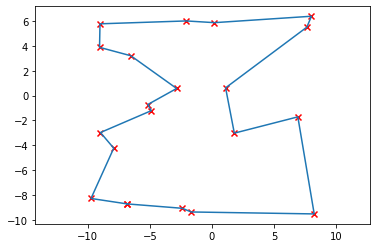

In [14]:
# Creates a figure and one subplot
fig, ax = plt.subplots()

# Plot the points
ax.scatter(optimal_tour[:,0], optimal_tour[:,1], c='red', marker = 'x')

# Plot the optimal tour
ax.plot(optimal_tour[:,0], optimal_tour[:,1])

# Show the plot
ax.set_aspect('equal', adjustable='datalim')
plt.show()